# HELP International  - MADHAVAN RANGARAJAN <br> <br>1) OUTLIER TREATMENT <br> 2) PCA <br> 3) CLUSTERING USING K-MEANS AND HIERARCHICAL <br> 4) REPORTING

### Importing necessary basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

### Importing 'Country_data.csv' 

In [2]:
ngo_data = pd.read_csv('/Users/madhavan/Desktop/new /Machine learning 1/pca-assignment/Country-data.csv')

### Looking at the head, info , shape and descriptive statistics

In [3]:
ngo_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
ngo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
ngo_data.shape

(167, 10)

### We have 167 rows which indicates we have 167 countries

In [6]:
ngo_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### checking the number of missing values in each column

In [7]:
ngo_data.isnull().mean() * 100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

## Checking the spread of all the features of 'HELP NGO' to detect outliers and observe how skewed the data is

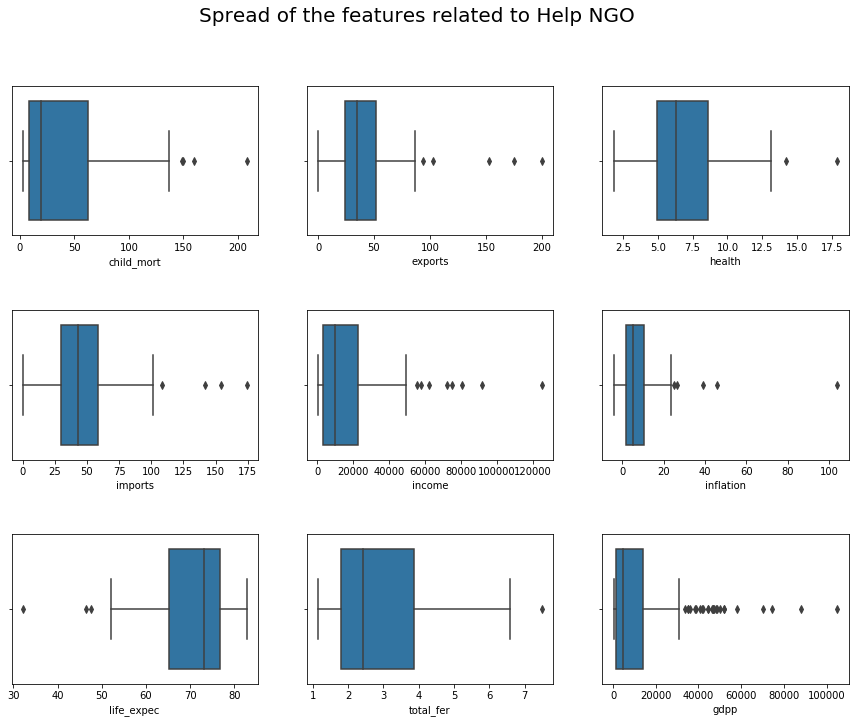

In [8]:
c = 1
plt.figure(figsize = (15,11))
for x in ngo_data.select_dtypes([int,float]):
    plt.subplot(3,3,c)
    sns.boxplot(ngo_data[x])
    c +=1

plt.suptitle('Spread of the features related to Help NGO' , size = 20 )
plt.subplots_adjust(hspace= 0.5)

## ` We know that high income and high gdpp are the traits of a 'DEVELOPED NATION' . Here, our business goal is to cluster countries and report atleast 5 countries which are in dire need of funding. In such case we donot require countries with extreme gdpp and extreme income.Let's remove those countries'. LETS CREATE A BACKUP FILE AND REMOVE OUTLIERS FROM IT SO THAT FINALLY WE CAN COMPARE THE COUNTRIES WE REMOVED.` 

In [9]:
back = copy.deepcopy(ngo_data) #creating a backup file and working on it

for x in ['gdpp','income']:
    q3 = back[x].quantile(0.90) # 90th percentile value of the features
    
    back = back[back[x] <= q3] # removing data points above the 90th percentile value


## `We can see that 'life_expec' is heavily right skewed having outliers in the left tail. We know that under-developed nations have low life expectency . We cannot remove the bottom outliers here because we donot want to lose the data . So let's do soft capping where in we assign 1st quantile value to all the datapoints below that value`

In [10]:

for y in ['life_expec']:
    q1 = back[y].quantile(0.01)
    back[y][back[y] <= q1] = q1

### Let's again check the spread of the data so that we can treat outliers accordingly

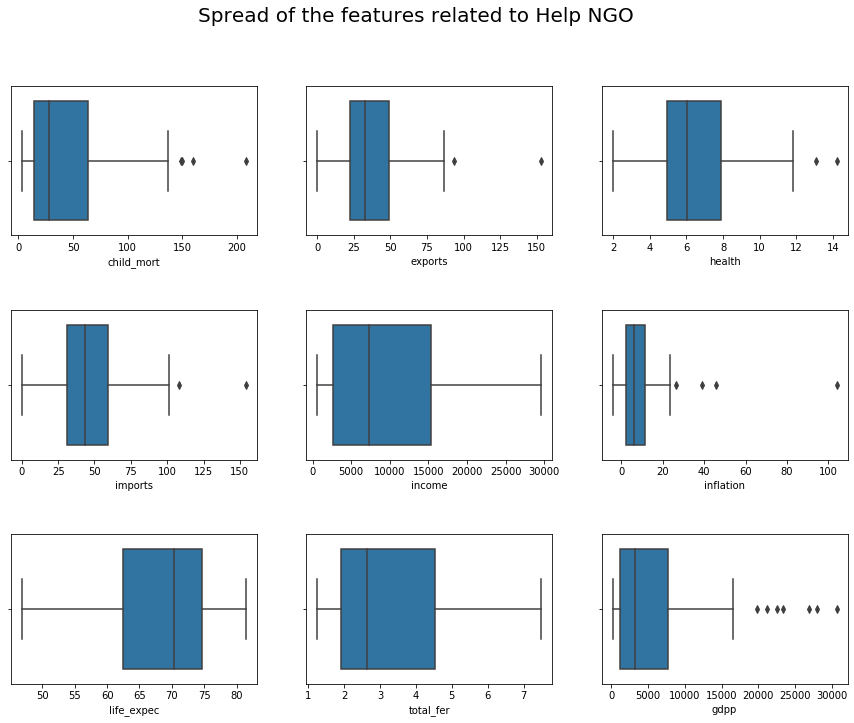

In [11]:
c = 1
plt.figure(figsize = (15,11))
for x in back.select_dtypes([int,float]):
    plt.subplot(3,3,c)
    sns.boxplot(back[x])
    c +=1

plt.suptitle('Spread of the features related to Help NGO' , size = 20 )
plt.subplots_adjust(hspace= 0.5)

## `We know that high child mortality and and high inflation are the traits of under-developed countries . Thus, we cannot remove outliers from the top end here. Let's do soft capping again`

In [12]:
for z in ['child_mort','inflation']:
    q3 = back[z].quantile(0.99)
    back[z][back[z] >= q3] = q3

### Now lets compare the shape of the dataframe before and after removing outliers so that we can judge how many countries we removed

In [13]:
ngo_data.shape

(167, 10)

In [14]:
back.shape

(135, 10)

### We can see that we removed about 32 countries. Let's check what are the countries we removed so that we can verify the countries are not under-developed nations. (subjective understanding)

In [15]:
set(ngo_data['country'].unique()).difference(back['country'].unique())

{'Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Denmark',
 'Equatorial Guinea',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Oman',
 'Qatar',
 'Saudi Arabia',
 'Singapore',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States'}

## `FROM OUR SUBJECTIVE UNDERSTANDING WE CAN UNDERSTAND THAT ABOVE COUNTRIES ARE DEVELOPED ECONOMIES. SO WE CAN SAFELY REMOVE THESE COUNTRIES . LETS FINALLY CHECK THE SPREAD OF FEATURES`

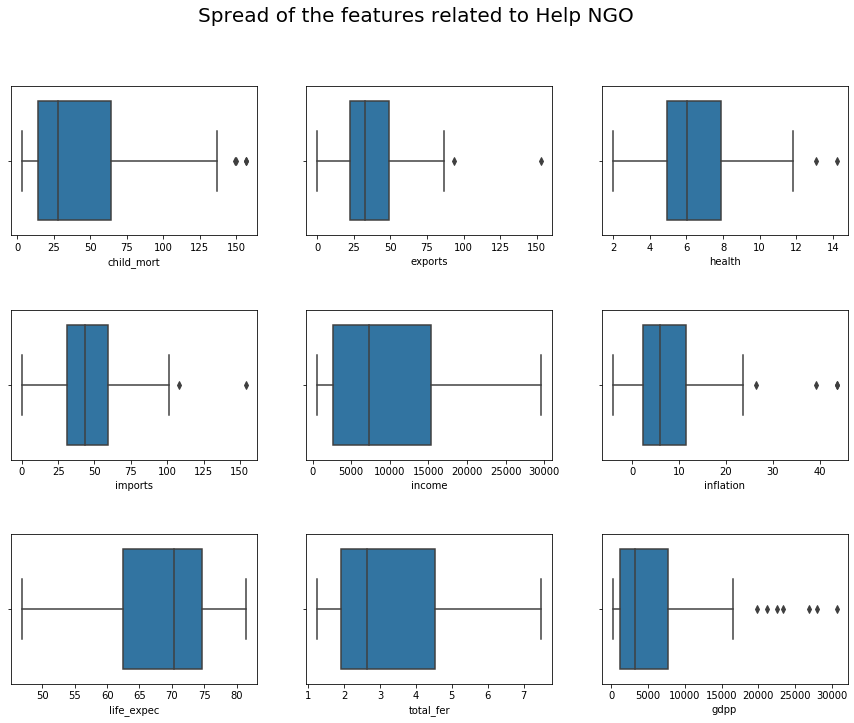

In [16]:
c = 1
plt.figure(figsize = (15,11))
for x in back.select_dtypes([int,float]):
    plt.subplot(3,3,c)
    sns.boxplot(back[x])
    c +=1

plt.suptitle('Spread of the features related to Help NGO' , size = 20 )
plt.subplots_adjust(hspace= 0.5)

### There are still some outliers on the top tail of 'gdpp'. Lets check those countries first

In [17]:
back[back['gdpp'] > 18000]


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800
60,Greece,3.9,22.1,10.30,30.7,28700,0.673,80.4,1.48,26900
74,Israel,4.6,35.0,7.63,32.9,29600,1.770,81.4,3.03,30600
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100
122,Portugal,3.9,29.9,11.00,37.4,27200,0.643,79.8,1.39,22500
135,Slovenia,3.2,64.3,9.41,62.9,28700,-0.987,79.5,1.57,23400


In [18]:
back[back['gdpp'] > 18000].mean()

child_mort        5.657143
exports          57.900000
health            8.965714
imports          60.642857
income        27671.428571
inflation         0.586571
life_expec       78.957143
total_fer         1.742857
gdpp          24614.285714
dtype: float64

## ` We can see that all the countries that have GDPP of 18000 and above have traits which are similar to developed nations (i.e low child mortality, high exports , good health score, high life_expec and high gdpp) . So let's remove those countries too`

In [19]:
back = back[back['gdpp'] <= 18000]

In [20]:
ngo_data = back  #arriving to our final data

### Let's check the co-relation matrix of all features

Text(0.5, 0.98, 'Co-relation matrix of features in HELP NGO')

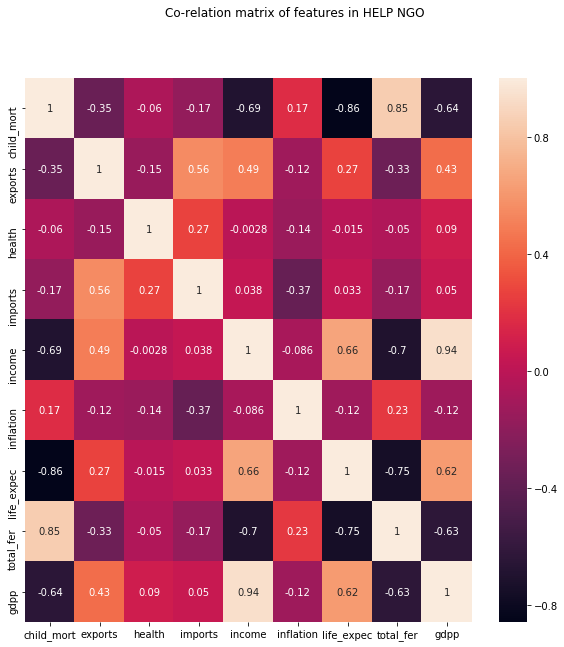

In [21]:
plt.figure(figsize = (10,10) )
sns.heatmap(ngo_data.corr() , annot = True)
plt.suptitle('Co-relation matrix of features in HELP NGO')

## `High co-relation present in between features tells us that most of the variance in one variable is explained by another variable. Moreover, our goal is to perform clustering and visualize the data. If we use hierarchical clustering it is computionally expensive if there are lot of features in the data . Taking above considerations lets do PCA - a dimensionality reduction technique on the original data before we cluster the data. `

### Let's do scaling before doing PCA as principal components are dependent on the variance of the data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
matrix = scaler.fit_transform(ngo_data.select_dtypes([int,float]))
scaled_data = pd.DataFrame(matrix,columns = ngo_data.select_dtypes([int,float]).columns)

matrix    #matrix is nothing but scaled data

array([[ 1.09783309, -1.34957996,  0.53337459, ..., -1.50955233,
         1.64976572, -0.95126793],
       [-0.77089326, -0.41040116,  0.09315858, ...,  1.0637119 ,
        -1.04107905, -0.08529717],
       [-0.49921701,  0.13223548, -0.9240396 , ...,  1.08931652,
        -0.24092377,  0.00529067],
       ...,
       [-0.60077822,  1.88536924,  0.21710289, ...,  0.65403799,
        -0.8474931 , -0.76593011],
       [ 0.2371018 , -0.30604796, -0.49237146, ..., -0.06289135,
         0.90768623, -0.76593011],
       [ 0.91756193,  0.05918824, -0.18892159, ..., -2.04724934,
         1.37874539, -0.72920532]])

In [25]:
scaled_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.097833,-1.349580,0.533375,-0.051963,-1.022373,0.120197,-1.509552,1.649766,-0.951268
1,-0.770893,-0.410401,0.093159,0.136234,0.199907,-0.492013,1.063712,-1.041079,-0.085297
2,-0.499217,0.132235,-0.924040,-0.738631,0.636226,0.943898,1.089317,-0.240924,0.005291
3,1.829074,1.379256,-1.488200,-0.153692,-0.392135,1.723075,-1.010262,1.869163,-0.222403
4,-0.930852,0.502689,-0.129086,0.660136,1.547059,-0.869233,1.127723,-0.731342,1.900290
...,...,...,...,...,...,...,...,...,...
123,-0.450975,0.560084,-0.462454,0.344778,-0.825515,-0.723292,-0.638995,0.152701,-0.359509
124,-0.758198,-0.384313,-0.607768,-1.440558,1.165097,4.347787,0.948491,-0.511944,2.218572
125,-0.600778,1.885369,0.217103,1.743545,-0.599276,0.449183,0.654038,-0.847493,-0.765930
126,0.237102,-0.306048,-0.492371,-0.586038,-0.600745,1.871490,-0.062891,0.907686,-0.765930


### Importing the class PCA from sklearn.decomposition

In [26]:
# PCA

from sklearn.decomposition import PCA

### Fitting pca with scaled data

In [27]:
pca = PCA(random_state = 100)
pca.fit(matrix)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
pca.components_

array([[-0.4355477 ,  0.26957549,  0.02732118,  0.12238624,  0.432708  ,
        -0.1214849 ,  0.40879631, -0.42523421,  0.41469153],
       [-0.07035437, -0.31647547, -0.3424159 , -0.69825471,  0.14976367,
         0.46849901,  0.18059689, -0.04655015,  0.11568328],
       [ 0.13443506,  0.61192009, -0.69827258,  0.172413  ,  0.0758642 ,
         0.22184815, -0.13059534,  0.13438882, -0.00909437],
       [ 0.1268444 ,  0.21207747,  0.54022094,  0.11524383,  0.20765174,
         0.68358256, -0.1738165 ,  0.16914994,  0.25413695],
       [-0.36650963, -0.01623541, -0.00493558,  0.29834043, -0.38496818,
         0.46950832,  0.32763727, -0.24051725, -0.49248597],
       [ 0.03307411, -0.1365202 , -0.07864547,  0.05018056,  0.08271596,
         0.09447677, -0.65383399, -0.72549754, -0.04417905],
       [ 0.0377467 , -0.61404777, -0.3075397 ,  0.59476217,  0.11895038,
         0.13416454,  0.03805946,  0.16816061,  0.33364949],
       [ 0.79642064,  0.00871818,  0.03233952,  0.06544856,  0

### The variance of the data explained by each principal component 

In [29]:
pca.explained_variance_ratio_

array([0.47166652, 0.1753694 , 0.12520799, 0.09268468, 0.07060372,
       0.02683803, 0.02024236, 0.01177756, 0.00560973])

## LETS PLOT A SCREEPLOT TO VISUALIZE THE CUMULATIVE VARIANCE EXPLAINED BY ADDING UP EACH PRINCIPAL COMPONENT

Text(0, 0.5, 'Cumulative Variance')

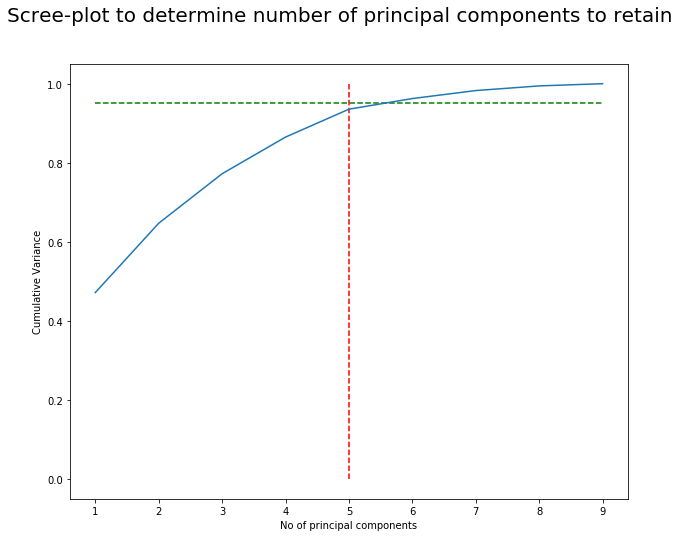

In [30]:
for_scree = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,8))
plt.plot(range(1,len(for_scree)+1), for_scree)
plt.hlines(y=0.95, xmax= 9, xmin=1, colors="g", linestyles="--")
plt.vlines(x=5, ymax=1, ymin=0, colors="r", linestyles="--")
plt.suptitle('Scree-plot to determine number of principal components to retain', size = 20)
plt.xlabel('No of principal components')
plt.ylabel('Cumulative Variance')

### From the above plot it is evident that by choosing 5 principal components we will be able capture about 95% of the variation in the data. Let's do incremental PCA

In [31]:
from sklearn.decomposition import IncrementalPCA

In [32]:
pca_5 = IncrementalPCA(n_components= 5 )

In [33]:
pca_data = pca_5.fit_transform(matrix)  # fitting the scaled data with 5 components

In [34]:
pca_df = pd.DataFrame(pca_data, columns = ['PC1','PC2','PC3','PC4','PC5']) # creating a dataframe of 5 principal compnents

### Let's plot a heatmap of the co-relation between Principal components to verify how we have achieved dimensionality reduction by removing the co-linearity between the features

Text(0.5, 0.98, 'Heatmap showing un co-related principal components after dimensionality reduction')

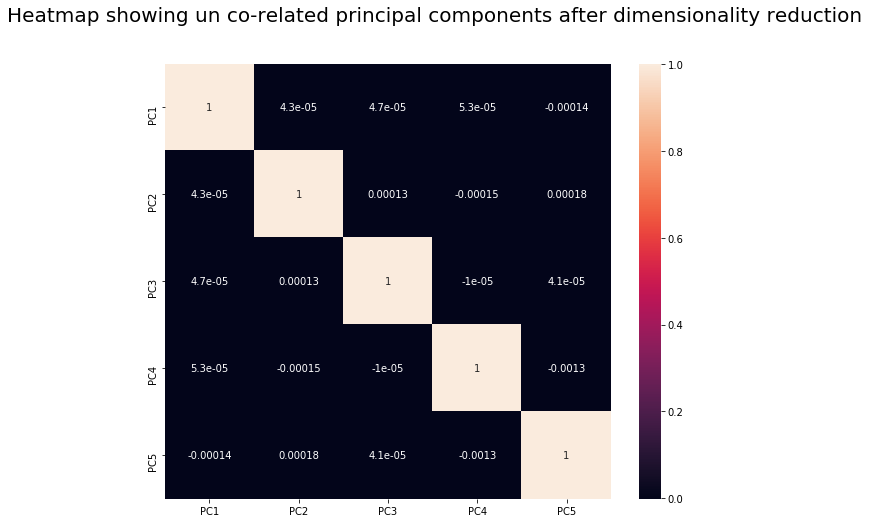

In [35]:
plt.figure(figsize = (10,8) )
sns.heatmap(pca_df.corr() ,annot = True)
plt.suptitle('Heatmap showing un co-related principal components after dimensionality reduction', size = 20)

### Let's check the spread of principal components before doing clustering as presence of lot of outliers may adversely affect k-means

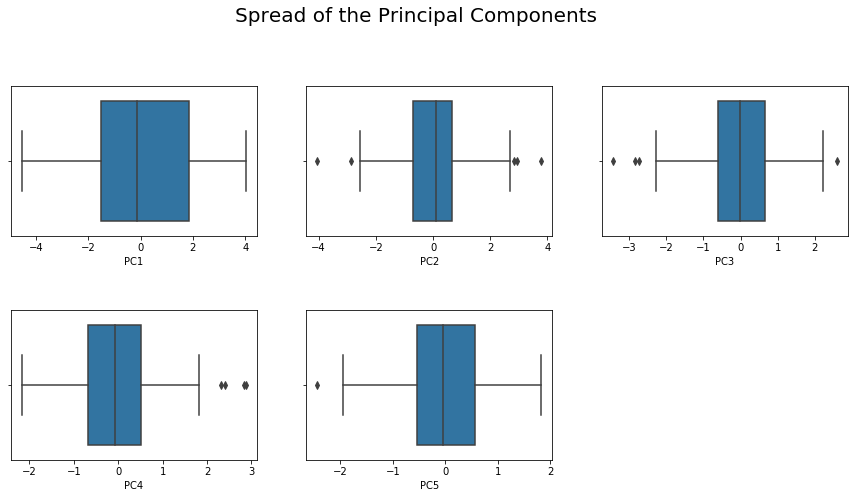

In [36]:
c = 1
plt.figure(figsize = (15,11))
for x in pca_df:
    plt.subplot(3,3,c)
    sns.boxplot(pca_df[x])
    c +=1

plt.suptitle('Spread of the Principal Components' , size = 20 )
plt.subplots_adjust(hspace= 0.5)

## BEFORE PERFORMING CLUSTERING ITS IMPORTANT TO VERIFY IF THE DATA HAS CLUSTER TENDENCY. LETS USE HOPKINS STATISTIC TO VERIFY IT

In [37]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def my_hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

# `HOPKINS STATISTIC`

In [57]:
my_hopkins(pca_df)

0.7513076310979729

### We have a good score close to 1. Thus the data can be clustered

### We can also use the library pyclustertend to find hopkins statistic

In [58]:
from pyclustertend import hopkins
help(hopkins)

Help on function hopkins in module pyclustertend.hopkins:

hopkins(D, sampling_size)
    Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability and a score tending to 0 express a high cluster tendency.
    
    Parameters
    ----------
    D : numpy array 
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16



# ` K MEANS CLUSTERING`

In [59]:
from sklearn.cluster import KMeans

### Lets plot a elbow curve to check the 'Squared sum of errors' for 'k' clusters to choose optimum 'k' . If the plot looks like an arm, then the elbow on the arm is optimal k. 

Text(0, 0.5, 'Inertia')

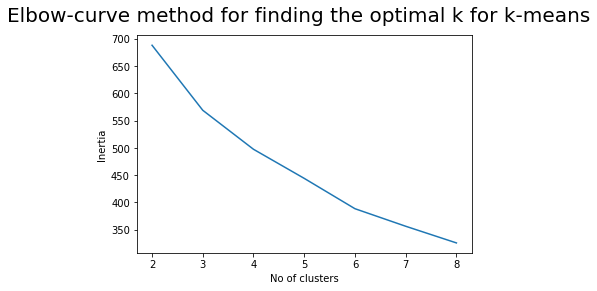

In [60]:


ssd = [] #list of squared errors
clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clust in clusters:
    kmeans = KMeans(n_clusters=num_clust, max_iter=100) #creating a kmeans object
    kmeans.fit(pca_df) #fitting the kmeans with principal components
    
    ssd.append(kmeans.inertia_)  #appending to inertia
plt.plot(clusters,ssd)
plt.suptitle('Elbow-curve method for finding the optimal k for k-means', size = 20)
plt.xlabel('No of clusters')
plt.ylabel('Inertia')


## Though 3 looks as optimal 'k' still the pattern is not clear. Let's plot silhouette metric which takes into consideration both average inter cluster distance and average intra cluster distance. Higher the silhouette score lower the intra cluster variablity

Text(0, 0.5, 'Silhouette metric')

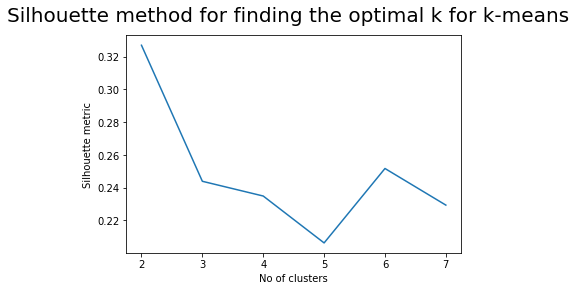

In [61]:
sil_list = []
from sklearn.metrics import silhouette_score  #importing from metrics
clusters = [x for x in range(2,8)] 
for num_clust in clusters:
    kmeans = KMeans(n_clusters=num_clust, max_iter=100)
    kmeans.fit(pca_df)
    label = kmeans.labels_
    
    silhouette_avg = silhouette_score(pca_df, label)
    sil_list.append(silhouette_avg)

plt.plot(clusters , sil_list)
plt.suptitle('Silhouette method for finding the optimal k for k-means', size = 20)
plt.xlabel('No of clusters')
plt.ylabel('Silhouette metric')

### Though 2 clusters seem to have a better silhouette metric our BUSINESS OBJECTIVE IS TO CLUSTER UNDER DEVELOPED ECONOMIES to provide funding. IF WE CLUSTER DATA INTO 2 CLUSTERS WE WILL GET MANY COUNTRIES IN BOTH THE CLUSTERS. So, lets choose 3 clusters which is easier for us to categorize into DEVELOPED, DEVELOPING AND UNDER DEVELOPED ECONOMIES respectively

In [62]:
kmeans = KMeans(n_clusters= 3, max_iter=100 , random_state = 10) #fitting k means with 3 clusters
kmeans.fit(pca_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

### Labels as below

In [63]:
kmeans.labels_

array([2, 1, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1,
       2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0,
       2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       2, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 0,
       1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 2, 2], dtype=int32)

In [64]:
ngo_data['k_mean_labels'] = kmeans.labels_ #adding a new column containing cluster labels to the dataframe

In [65]:
ngo_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_mean_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.620,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,43.622,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.100,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.600,67.5,4.67,1310,2


# `Hierarchical clustering`

In [66]:
# importing necessary libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Let's perform single linkage and plot a dendrogram to visualize the cluster formation

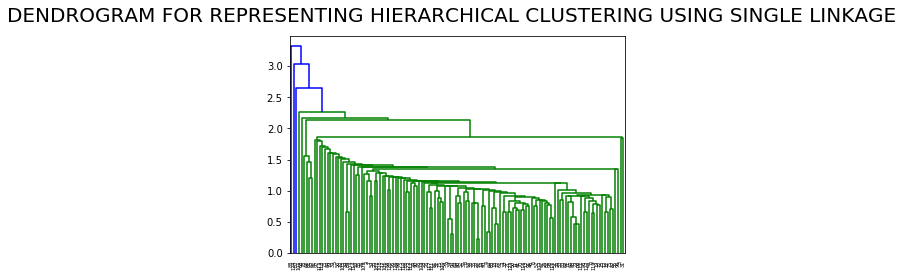

In [67]:
mergings = linkage(pca_df, method= 'single', metric='euclidean')
dendrogram(mergings)
plt.suptitle('DENDROGRAM FOR REPRESENTING HIERARCHICAL CLUSTERING USING SINGLE LINKAGE', size = 20)
plt.show()

### We can see that clusters are not formed perfectly using single linkage. Let's perform complete linkage

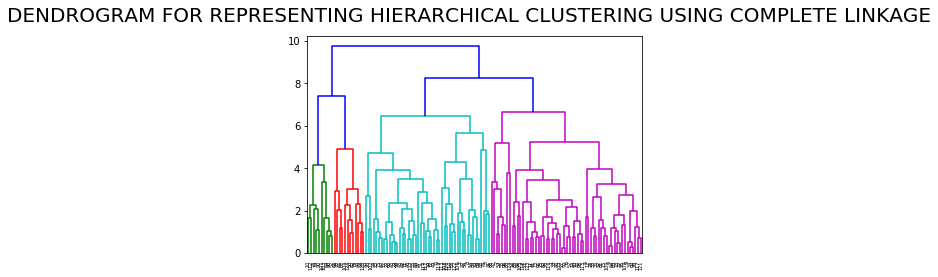

In [68]:
merge = linkage(pca_df, method= 'complete', metric='euclidean')
dendrogram(merge)
plt.suptitle('DENDROGRAM FOR REPRESENTING HIERARCHICAL CLUSTERING USING COMPLETE LINKAGE', size = 20)
plt.show()

## Looking at the dendrogram the largest vertical distance is formed when we use 2 clusters. But, as per our business goal we need to choose clusters accordingly. We can choose 4 clusters (BECAUSE WE NEED ONLY FEW COUNTRIES) . HIERARCHIAL CLUSTERING PROVIDES THIS FLEXIBILITY

### Lets assign the derived labels to all our dataframes

In [69]:
hier_labels = cut_tree(merge, n_clusters= 4 ).reshape(-1, )
ngo_data['hier_labels'] = hier_labels
pca_df['hier_labels'] = hier_labels
pca_df['k_mean_labels'] = kmeans.labels_
scaled_data['hier_labels'] = hier_labels
scaled_data['k_mean_labels'] = kmeans.labels_

### We can now perform ANALYSIS OF THE CLUSTERS and COMPARE BOTH KMEANS AND HIERARCHICAL

In [70]:
ngo_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_mean_labels,hier_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


In [71]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

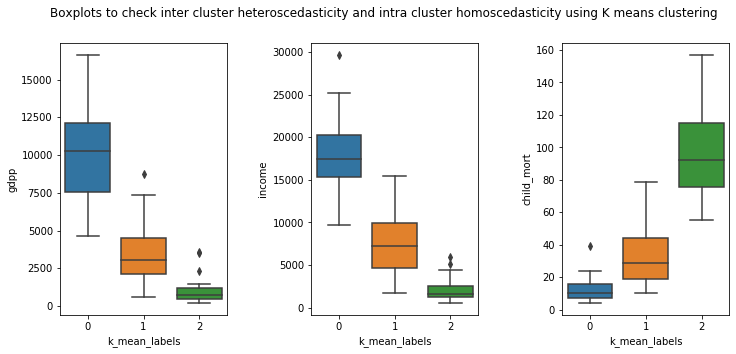

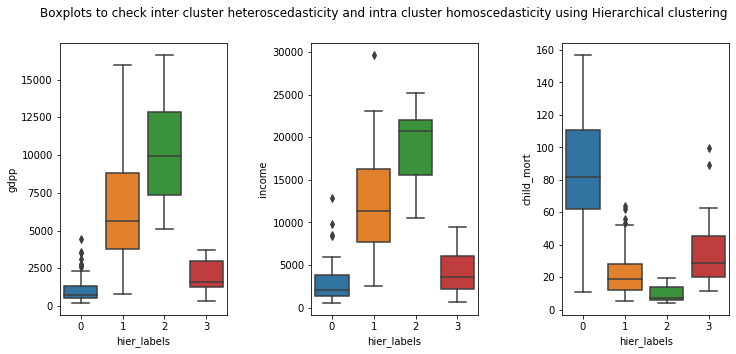

In [72]:

temp = ['K means clustering', 'Hierarchical clustering'] 
a = 0
for x in  ['k_mean_labels' , 'hier_labels']:
    plt.figure(figsize = (12,5))
    c = 1
    for variables in  ['gdpp','income', 'child_mort']:
        plt.subplot(1,3,c)
        sns.boxplot(x= x, y= variables , data= ngo_data)
        c +=1

        plt.subplots_adjust(wspace=0.50)
    plt.suptitle('Boxplots to check inter cluster heteroscedasticity and intra cluster homoscedasticity using ' + temp[a])
    a +=1

### Observations: <br> a) Clusters formed using k-means has better intra cluster homeoscedacity than clusters formed using hierarchichal clustering <br> b) As per our business goal the main cluster we need is 'under-developed countries'. For both methods of clustering the required clusters are formed efficiently

### ` Let's group the data according to 'k_mean_labels' and visualize the average 'gdpp','income' and 'child_mort' accordingly`

Text(0.5, 0.98, 'Mean of gdpp,income and child mortality across various cluster labels for K Means')

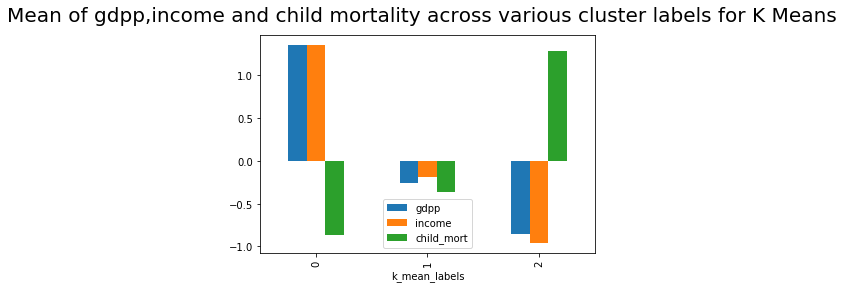

In [73]:
scaled_data.groupby('k_mean_labels')[['gdpp','income', 'child_mort']].mean().plot(kind = 'bar')
plt.suptitle('Mean of gdpp,income and child mortality across various cluster labels for K Means' , size = 20)

### `Let's group the data according to 'hier_labels' and visualize the average 'gdpp','income' and 'child_mort' accordingly`

Text(0.5, 0.98, 'Mean of gdpp,income and child mortality across various cluster labels for Hierarchical')

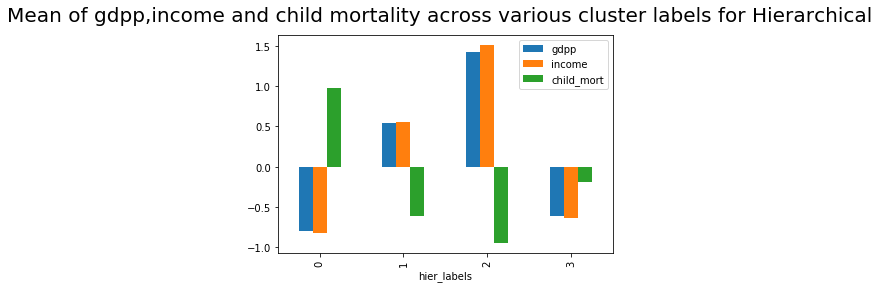

In [74]:
scaled_data.groupby('hier_labels')[['gdpp','income', 'child_mort']].mean().plot(kind = 'bar')
plt.suptitle('Mean of gdpp,income and child mortality across various cluster labels for Hierarchical' , size = 20)

## ` Both the methods seems to give efficient results. 'k_mean_label' with 2 is under developed and 'hier_label' with 0 is under developed . Lets map the labels accordingly`

In [75]:
ngo_data['Kmeans_Clusters'] = ngo_data['k_mean_labels'].map({0:'Developed' , 2: 'Under-Developed' , 1: 'Developing' })
ngo_data['Hier_Clusters'] = ngo_data['hier_labels'].map({1:'Developed' , 0: 'Under-Developed' , 2: 'Developed++',3:'Developing' })

## ` VISUALIZING CLUSTERS USING FIRST TWO PRINCIPAL COMPONENTS FOR BOTH K-MEANS AND HIERARCHICAL`

Text(0.5, 0.98, 'VISUALIZING CLUSTERS USING FIRST TWO PRINCIPAL COMPONENTS FOR HIERARCHICAL')

<Figure size 432x288 with 0 Axes>

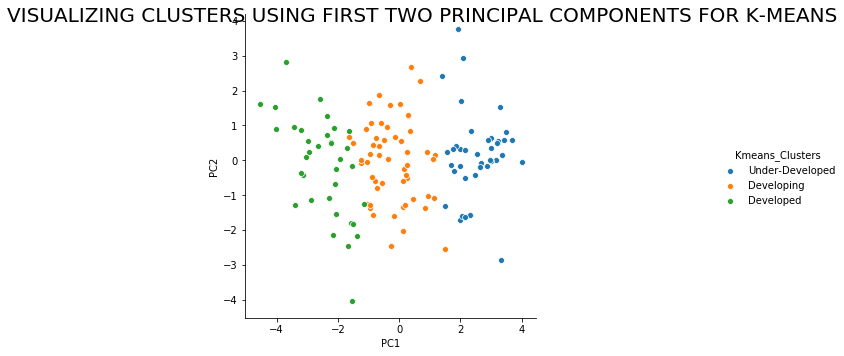

<Figure size 432x288 with 0 Axes>

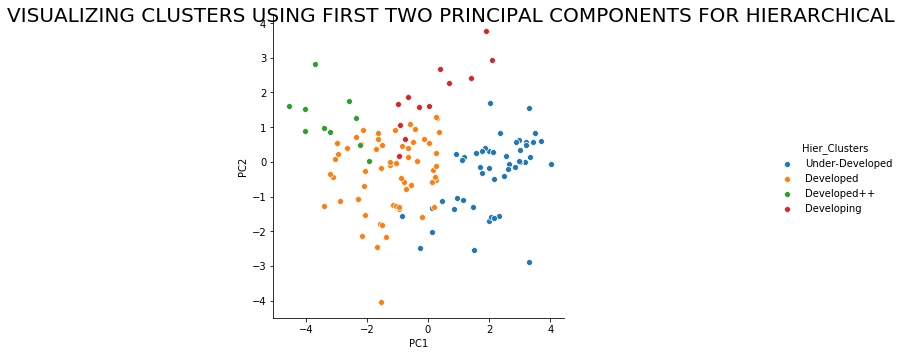

In [76]:


pca_df['Kmeans_Clusters']= ngo_data['Kmeans_Clusters'].array
pca_df['Hier_Clusters'] = ngo_data['Hier_Clusters'].array
plt.figure()
sns.pairplot(data=pca_df,x_vars= ['PC1'] , y_vars = ['PC2'], hue = "Kmeans_Clusters", height=5)
plt.suptitle('VISUALIZING CLUSTERS USING FIRST TWO PRINCIPAL COMPONENTS FOR K-MEANS' , size = 20)
plt.figure()
sns.pairplot(data=pca_df,x_vars= ['PC1'] , y_vars = ['PC2'], hue = "Hier_Clusters", height=5)
plt.suptitle('VISUALIZING CLUSTERS USING FIRST TWO PRINCIPAL COMPONENTS FOR HIERARCHICAL' , size = 20)


### We can see how the clusters vary across the data. We can see a clear cluster tendency . Now let's visualize how the clusters are formed across the actual data

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'VISUALIZING CLUSTERS FORMED BY HIERARCHICAl ACROSS CHILD MORTALITY AND GDPP ')

<Figure size 432x288 with 0 Axes>

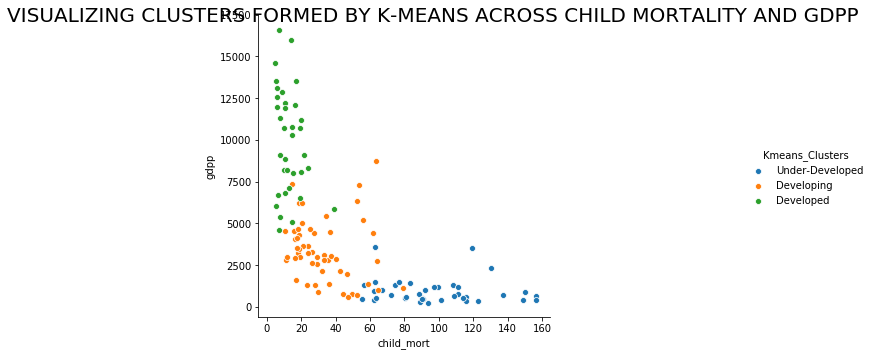

<Figure size 432x288 with 0 Axes>

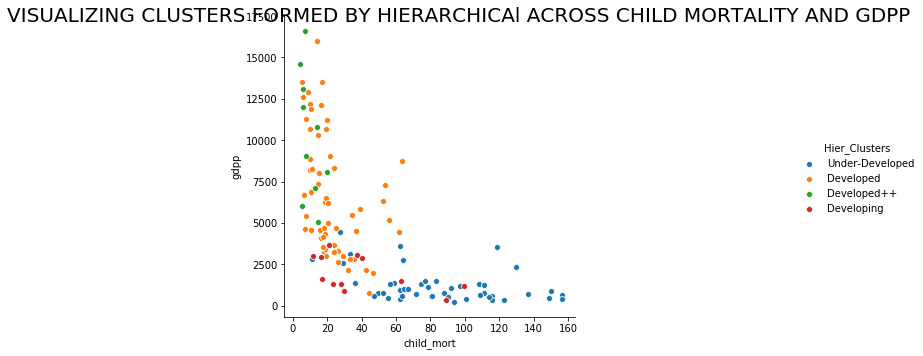

In [77]:
plt.figure()
sns.pairplot(data=ngo_data,x_vars= ['child_mort'] , y_vars = ['gdpp'], hue = "Kmeans_Clusters", size=5)
plt.suptitle('VISUALIZING CLUSTERS FORMED BY K-MEANS ACROSS CHILD MORTALITY AND GDPP ' , size = 20)
plt.figure()
sns.pairplot(data=ngo_data,x_vars= ['child_mort'] , y_vars = ['gdpp'], hue = "Hier_Clusters", size=5)
plt.suptitle('VISUALIZING CLUSTERS FORMED BY HIERARCHICAl ACROSS CHILD MORTALITY AND GDPP ' , size = 20)


## `Though hierarchical clustering doesnot have clear variance between developed and extremly developed nations we are concerned only with 'under-developed' nations. In that context both methods do a good job`

## 'We only want the countries which are in dire need of aid . So the method which has lower number of countries under the label 'under developed' is a better method to opt to.Lets visualize '

In [78]:
values = pd.concat([ngo_data['Kmeans_Clusters'].value_counts().to_frame(),ngo_data['Hier_Clusters'].value_counts().to_frame()],axis = 1)
values

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Kmeans_Clusters,Hier_Clusters
Developed,35.0,58
Developed++,NaN,10
Developing,54.0,12
Under-Developed,39.0,48


Text(0.5, 0.98, 'NO OF COUNTRIES UNDER EACH CLUSTER FOR KMEANS AND HIERARCHICAL ')

<Figure size 1440x1080 with 0 Axes>

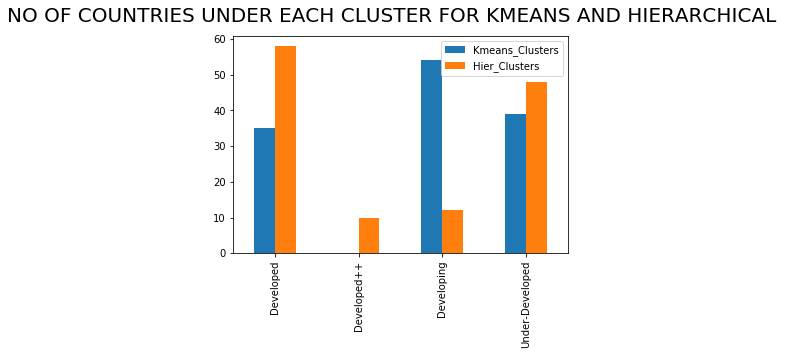

In [79]:
plt.figure(figsize = (20,15))
values.plot(kind = 'bar')
plt.suptitle('NO OF COUNTRIES UNDER EACH CLUSTER FOR KMEANS AND HIERARCHICAL ' , size = 20)

# ` One interesting observation is though clusters formed under 'Hierarchical Clustering' are greater than 'K MEANS' there are lesser countries in under developed category for KMEANS. So lets consider both hierarchical clustering and kmeans together and extract a dataframe of all countries that form under 'under-developed' category for both the methods`

In [80]:
final = ngo_data[(ngo_data['Kmeans_Clusters'] == 'Under-Developed') & (ngo_data['Hier_Clusters'] == 'Under-Developed')]
final.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_mean_labels,hier_labels,Kmeans_Clusters,Hier_Clusters
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2,0,Under-Developed,Under-Developed
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,2,0,Under-Developed,Under-Developed
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2,0,Under-Developed,Under-Developed
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2,0,Under-Developed,Under-Developed
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2,0,Under-Developed,Under-Developed
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2,0,Under-Developed,Under-Developed
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2,0,Under-Developed,Under-Developed
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2,0,Under-Developed,Under-Developed
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2,0,Under-Developed,Under-Developed
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2,0,Under-Developed,Under-Developed


# ` OUR BUSINESS GOAL IS WE NEED TO FIND AROUND TOP 5 COUNTRIES WHICH ARE IN DIRE NEED OF FINANCIAL AID . GDPP , INCOME AND CHILD_MORT BEING THE IMPORTANT VARIABLES FOR CONSIDERATION OF FINANCIAL AID . LETS SORT THE COUNTRIES ACCORDING TO RESPECTIVE VARIABLES AND DERIVE TOP 12 COUNTRIES `

In [81]:
dic = {} # dictionary to add countries
for basis in ['gdpp','income','child_mort']:
    if basis == 'child_mort':
        #sorting and extracting top 12 country names
        temp = list(final.sort_values(basis,ascending = False)['country'].head(12)) 
        dic[basis] = temp
    else:
        temp = list(final.sort_values(basis,ascending = True)['country'].head(12))
        dic[basis] = temp

    


# `5 COUNTRIES WHICH ARE IN DIRE NEED OF FINANCIAL AID ARE AS FOLLOWS`

In [82]:
COUNTRY_AID = list(set(list(dic.values())[0]).intersection(set(list(dic.values())[1])).intersection(set(list(dic.values())[2])))
COUNTRY_AID



['Central African Republic',
 'Congo, Dem. Rep.',
 'Guinea-Bissau',
 'Sierra Leone',
 'Niger']

In [87]:
ngo_data[['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']][ngo_data.country.isin(COUNTRY_AID)]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
37,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334
64,Guinea-Bissau,114.0,14.9,8.50,35.2,1390,2.97,55.6,5.05,547
112,Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,156.6,16.8,13.10,34.5,1220,17.20,55.0,5.20,399
